<a href="https://colab.research.google.com/github/Lungelo-cloud/Hub-Analytics/blob/main/Hub_Analytica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [ ]:
sheet_id = '1WGVWOsjKdp4eP_6PcqdnU7r6r8RW0hAtUVakTlrFWxw'
df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")
df.head()

,Timestamp,First Name,Phone Number,Sign-in Time,What are you working on today?,What equipment will you use?,Internet?,How many hours will you be putting in?,Are you a member of The Hub?,Are you a student (from any institution)?,What company do you work for?,Last Name,What equipment will you check out?
0,2/11/2021,Kwanele,7815 8606,11:00:00 AM,Company Work,Brought my own workstation,Shared Hotspot,6:00:00 AM,NaN,NaN,NaN,NaN,NaN
1,2/11/2021,José,NaN,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,8:00:00 PM,Yes,No,Ummo,Rego,NaN
2,2/11/2021,Simanga,78501932,4:00:00 AM,Content & Creativity,PC Workstation,Shared Hotspot,NaN,NaN,NaN,NaN,NaN,NaN
3,2/13/2021,Simanga,78501932,11:00:00 AM,Content & Creativity,Mac Workstation,Shared Hotspot,NaN,NaN,NaN,NaN,NaN,NaN
4,2/13/2021,José,NaN,8:00:00 AM,Company Work,Mac Workstation,Shared Hotspot,8:00:00 PM,Yes,No,Ummo,Rego,NaN


In [ ]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")

Timestamp
False    745
Name: Timestamp, dtype: int64

First Name
False    745
Name: First Name, dtype: int64

Phone Number
False    420
True     325
Name: Phone Number, dtype: int64

Sign-in Time
False    745
Name: Sign-in Time, dtype: int64

What are you working on today?
False    745
Name: What are you working on today?, dtype: int64

What equipment will you use?
False    745
Name: What equipment will you use?, dtype: int64

Internet?
False    744
True       1
Name: Internet?, dtype: int64

How many hours will you be putting in?
False    724
True      21
Name: How many hours will you be putting in?, dtype: int64

Are you a member of The Hub?
False    642
True     103
Name: Are you a member of The Hub?, dtype: int64

Are you a student (from any institution)?
True     424
False    321
Name: Are you a student (from any institution)?, dtype: int64

What company do you work for?
True     420
False    325
Name: What company do you work for?, dtype: int64

Last Name
True     420
False    32

In [ ]:
mode_sign_out_time = df['What time do you expect to be out of The Hub?'].mode(dropna = True)
mode_internet = df['Internet?'].mode(dropna = True)
print('mode sign out time: \n',mode_sign_out_time)
print('')
print('mode internet: \n',mode_internet)

mode sign out time: 
 0    5:00:00 PM
dtype: object

mode internet: 
 0    Shared Hotspot
dtype: object


In [ ]:
df['What time do you expect to be out of The Hub?'] = df['What time do you expect to be out of The Hub?'].replace(np.nan, '5:00:00 PM')
df['Internet?'] = df['Internet?'].replace(np.nan, 'Shared Hotspot')

In [ ]:
#df['Timestamp'] = pd.to_datetime(df['Timestamp'])
#df['Sign-in Time'] = pd.to_datetime(df['Sign-in Time'])
#df['What time do you expect to be out of The Hub?'] = pd.to_datetime(df['What time do you expect to be out of The Hub?'])
df1['How many hours will you be putting in?'] = pd.to_numeric(df1['How many hours will you be putting in?'])
df1.dtypes

First Name                                    object
Phone Number                                  object
Sign-in Time                                  object
What are you working on today?                object
What equipment will you use?                  object
Internet?                                     object
How many hours will you be putting in?       float64
Are you a member of The Hub?                  object
Are you a student (from any institution)?     object
What company do you work for?                 object
Last Name                                     object
What equipment will you check out?           float64
dtype: object

In [ ]:
df = df.set_index('Timestamp')

In [ ]:
missing_dates = pd.date_range(df.index.min(), df.index.max()).difference(df.index).size - 9
missing_dates

52

In [ ]:
df['Time Duration(hrs)'] = (df['What time do you expect to be out of The Hub?']-df['Sign-in Time'])/np.timedelta64(1,'h')
df['Time Duration(hrs)'] = abs(df['Time Duration(hrs)'])
df['Time Duration(hrs)'] = df['Time Duration(hrs)'].replace(0.0, 8.0)

In [ ]:
df1 = df.loc['2021-08-23 00:00:00':'2021-08-29 23:00:00']

In [ ]:
cato=df1['What are you working on today?'].str.split(',')
cat_set=[]
for i in cato.dropna():
    cat_set.extend(i)
plt1 = pd.Series(cat_set)
plt1 = plt1.str.strip()
plt2=plt1.value_counts().sort_values(ascending=False).to_frame()
plt2.columns = ['Count']

In [ ]:
plt2.T

,Company Work,Research,Content & Creativity,Coding,Meeting,Academic Work
Count,25,21,18,16,5,4


In [ ]:
len(df1)

54

In [ ]:
df2 = df1['What are you working on today?']
splitting_columns = lambda x: pd.Series([i for i in reversed(x.split(','))])
df2 = df2.apply(splitting_columns)
df2[0] = df2[0].str.strip()
df2[1] = df2[1].str.strip()
df2[2] = df2[2].str.strip()
df3 = df2[0].append(df2[1], ignore_index=True)
df4 = df3.append(df2[2], ignore_index=True)
df4 = df4.dropna()
df5 = df4.value_counts(dropna=True).to_frame()
df5.columns = ['count']
df5

,count
Company Work,23
Research,21
Content & Creativity,18
Coding,16
Meeting,5
Academic Work,4


In [ ]:
df6 = df1['What company do you work for?']
df7 = df6.value_counts().to_frame()
df7.columns = ['Number of hub visits']

,Number of hub visits
Freelancer,19
Kingdom XLR,11
Ummo,11
Snowsen,7
SV Tech,2
Vundzisa,1


In [ ]:
df8 = df1['What equipment will you use?']
df8 = df8.apply(splitting_columns)
df8[0] = df8[0].str.strip()
df8[1] = df8[1].str.strip()
df8[2] = df8[2].str.strip()
df8[3] = df8[3].str.strip()
df9 = df8[0].append(df8[1], ignore_index=True)
df10 = df9.append(df8[2], ignore_index=True)
df11 = df10.append(df8[3], ignore_index=True)
equipment_used = df11.value_counts(dropna=True).to_frame()
equipment_used.columns = ['count']
equipment_used

,count
Mac Workstation,22
Brought my own workstation,17
Keyboard,14
Monitor,11
Mouse,11
PC Workstation,8
Audio Box,5


In [ ]:
d12 = df1['First Name'].str.strip()
d12 = d12.replace('Kwanele Prince', 'Kwanele')
d12 = d12.replace('Tsabedze', 'Kwanele')
d13 = d12.value_counts().to_frame()
d13.columns = ['Number of hub visits']
hubbers = d13
hubbers

,Number of hub visits
José,7
Simanga,4
Lungelo,4
Bafana,4
Fanelesibonge,4
Sibahle,4
Mzwandile,4
Tiyandza,3
Mlungisi,3
Muzi,3


In [ ]:
df1['First Name'].unique()

array(['Simanga', 'José', 'Lungelo', 'Bafana', 'Fanelesibonge ',
       'Gcinimiyalo ', 'Muzi Chaboy', 'Gcinimiyalo', 'Zack', 'Sibahle',
       'Mzwandile ', 'Tiyandza', 'Fanelesibonge', 'Mlungisi ',
       'Kwanele Prince', 'Lungelo ', 'Sabelo ', 'Tyga', 'Bagcinele',
       'Sabelo', 'José ', 'Thelumusa', 'Sibahle ', 'Sihle', 'Mzwandile'],
      dtype=object)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df1['First Name'] = df1['First Name'].str.strip()
df1['First Name'] = df1['First Name'].replace('Kwanele Prince', 'Kwanele')
df1['First Name'] = df1['First Name'].replace('Tsabedze', 'Kwanele') 
df1['First Name'] = df1['First Name'].replace('Muzi Chaboy', 'Muzi')
df1['First Name'] = df1['First Name'].replace('Tyga', 'Sikhulile')
#df1['Time Duration(hrs)'] = abs(df1['Time Duration(hrs)'])
d14 = df1[['First Name', 'How many hours will you be putting in?']]
d14 = d14.groupby(['First Name'], as_index=False).sum()
d200 = d14.set_index(['First Name']).sort_values(['How many hours will you be putting in?'], ascending=False)
d200

,How many hours will you be putting in?
First Name,
José,86.5
Fanelesibonge,52.0
Sikhulile,48.0
Sibahle,40.0
Lungelo,31.0
Simanga,25.0
Bafana,24.5
Tiyandza,17.0
Mzwandile,16.0


In [ ]:
ultimate = hubbers.merge(d200, right_index=True, left_index=True)
ultimate

,Number of hub visits,How many hours will you be putting in?
José,7,86.5
Simanga,4,25.0
Lungelo,4,31.0
Bafana,4,24.5
Fanelesibonge,4,52.0
Sibahle,4,40.0
Mzwandile,4,16.0
Tiyandza,3,17.0
Mlungisi,3,16.0
Muzi,3,5.0


In [ ]:
ultimate1 = df7.merge(d15, right_index=True, left_index=True)
ultimate1

,Number of hub visits,How many hours will you be putting in?
Freelancer,19,140.0
Kingdom XLR,11,85.0
Ummo,11,126.5
Snowsen,7,41.5
SV Tech,2,15.0
Vundzisa,1,4.0


In [ ]:
#df1['Time Duration(hrs)'] = abs(df1['Time Duration(hrs)'])
d15 = df1[['What company do you work for?', 'How many hours will you be putting in?']]
d15 = d15.groupby(['What company do you work for?'], as_index=False).sum()
d15 = d15.set_index(['What company do you work for?']).sort_values(['How many hours will you be putting in?'], ascending=False)

Below is hub activity for the past week

In [ ]:
df2 = df1['What are you working on today?']
splitting_columns = lambda x: pd.Series([i for i in reversed(x.split(','))])
df2 = df2.apply(splitting_columns)
df2['First Name'] = df1['First Name']
cols = df2.columns.tolist()
cols = cols[-1:] + cols[:-1]
df2 = df2[cols]
df2[0] = df2[0].str.strip()
df2[1] = df2[1].str.strip()
df2[2] = df2[2].str.strip()
df3 = df2[0].append(df2[1], ignore_index=False)
df4 = df3.append(df2[2], ignore_index=False)
df4 = df4.to_frame()
df4['First Name'] = df1['First Name']
df4 = df4.dropna()
#df4 = df4.groupby(['First Name'], as_index=False)
#df5 = df4.value_counts(dropna=True).to_frame()
#df5.columns = ['count']
d20 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Company Work')].count())
d20 = d20.to_frame()
d20.columns = ['Company Work']
d21 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Academic Work')].count())
d21 = d21.to_frame()
d21.columns = ['Academic Work']
d22 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Research')].count())
d22 = d22.to_frame()
d22.columns = ['Research']
d23 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Coding')].count())
d23 = d23.to_frame()
d23.columns = ['Coding']
d24 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Meeting')].count())
d24 = d24.to_frame()
d24.columns = ['Meeting']
d25 = df4.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Content & Creativity')].count())
d25 = d25.to_frame()
d25.columns = ['Content & Creativity']
d30 = d20.merge(d21, right_index=True, left_index=True)
d31 = d30.merge(d22, right_index=True, left_index=True)
d32 = d31.merge(d23, right_index=True, left_index=True)
d33 = d32.merge(d24, right_index=True, left_index=True)
d34 = d33.merge(d25, right_index=True, left_index=True)
d34

,Company Work,Academic Work,Research,Coding,Meeting,Content & Creativity
First Name,,,,,,
Bafana,1,0,0,2,0,4
Bagcinele,0,0,2,0,0,0
Fanelesibonge,4,0,0,4,0,0
Gcinimiyalo,0,0,0,0,0,2
José,6,0,5,7,2,0
Kwanele,1,0,0,0,0,0
Lungelo,0,0,3,3,0,0
Mlungisi,0,0,3,0,0,0
Muzi,0,0,0,0,1,2


Below is hub equipment use this past week

In [ ]:
df100 = df1['What equipment will you use?']
splitting_columns = lambda x: pd.Series([i for i in reversed(x.split(','))])
df100 = df100.apply(splitting_columns)
df100['First Name'] = df1['First Name']
cols = df100.columns.tolist()
cols = cols[-1:] + cols[:-1]
df100 = df100[cols]
df100[0] = df100[0].str.strip()
df100[1] = df100[1].str.strip()
df100[2] = df100[2].str.strip()
df100[3] = df100[3].str.strip()
df101 = df100[0].append(df100[1], ignore_index=False)
df102 = df101.append(df100[2], ignore_index=False)
df103 = df102.append(df100[3], ignore_index=False)
df103 = df103.to_frame()
df103['First Name'] = df1['First Name']
df103 = df103.dropna()
#df103 = df103.groupby(['First Name'], as_index=False)
#df104 = df103.value_counts(dropna=True).to_frame()
#df104.columns = ['count']
d40 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Mac Workstation')].count())
d40 = d40.to_frame()
d40.columns = ['Mac Workstation']
d41 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('PC Workstation')].count())
d41 = d41.to_frame()
d41.columns = ['PC Workstation']
d42 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Keyboard')].count())
d42 = d42.to_frame()
d42.columns = ['Keyboard']
d43 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Mouse')].count())
d43 = d43.to_frame()
d43.columns = ['Mouse']
d44 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Monitor')].count())
d44 = d44.to_frame()
d44.columns = ['Monitor']
d45 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Camera')].count())
d45 = d45.to_frame()
d45.columns = ['Camera']
d46 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Projector')].count())
d46 = d46.to_frame()
d46.columns = ['Projector']
d47 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Brought my own workstation')].count())
d47 = d47.to_frame()
d47.columns = ['Brought my own workstation']
d48 = df103.groupby(['First Name'])[0].apply(lambda x: x[x.str.contains('Audio Box')].count())
d48 = d48.to_frame()
d48.columns = ['Audio Box']
d100 = d40.merge(d41, right_index=True, left_index=True)
d101 = d100.merge(d42, right_index=True, left_index=True)
d102 = d101.merge(d43, right_index=True, left_index=True)
d103 = d102.merge(d44, right_index=True, left_index=True)
d104 = d103.merge(d45, right_index=True, left_index=True)
d105 = d104.merge(d46, right_index=True, left_index=True)
d106 = d105.merge(d47, right_index=True, left_index=True)
d107 = d106.merge(d48, right_index=True, left_index=True)
d107

,Mac Workstation,PC Workstation,Keyboard,Mouse,Monitor,Camera,Projector,Brought my own workstation,Audio Box
First Name,,,,,,,,,
Bafana,0,4,4,4,4,0,0,0,0
Bagcinele,2,0,0,0,0,0,0,0,0
Fanelesibonge,0,0,0,0,0,0,0,4,0
Gcinimiyalo,2,0,0,0,0,0,0,0,0
José,7,0,0,0,0,0,0,0,0
Kwanele,0,0,0,0,0,0,0,1,0
Lungelo,0,0,4,0,0,0,0,4,0
Mlungisi,0,0,0,0,0,0,0,3,0
Muzi,0,0,1,1,0,0,0,2,3


# Historical Analysis

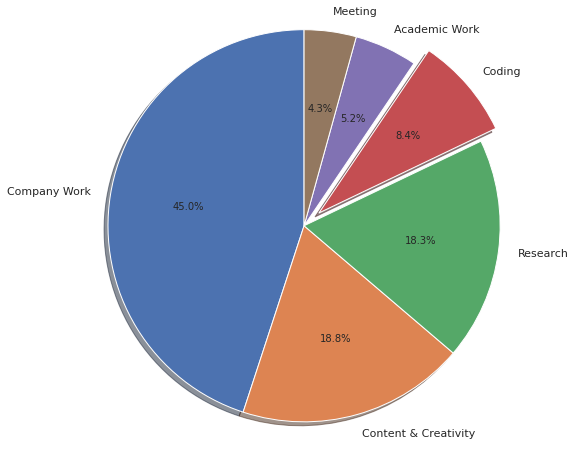

In [ ]:
e1 = df['What are you working on today?']
splitting_columns = lambda x: pd.Series([i for i in reversed(x.split(','))])
e1 = e1.apply(splitting_columns)
e1[0] = e1[0].str.strip()
e1[1] = e1[1].str.strip()
e1[2] = e1[2].str.strip()
e2 = e1[0].append(e1[1], ignore_index=True)
e3 = e2.append(e1[2], ignore_index=True)
hub_activity = e3.value_counts(dropna=True).to_frame()
hub_activity.columns = ['Count']
hub_activity = hub_activity.reset_index() 
hub_activity = hub_activity.rename(columns={'index':'Activity'})
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = hub_activity['Activity']
sizes = hub_activity['Count']
explode = (0, 0, 0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(9, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
hub_activity

,Activity,Count
0,Company Work,304
1,Content & Creativity,127
2,Research,124
3,Coding,57
4,Academic Work,35
5,Meeting,29


In [ ]:
df['First Name'] = df['First Name'].str.strip()
total_number_signees = (df['First Name'].unique()).size
df['First Name'].unique()

array(['Kwanele', 'José', 'Simanga', 'Sikhulile', 'Gcinimiyalo',
       'Lungelo', 'Zack', 'Mzwandile', 'Sabelo', 'Sibusiso', 'Mlungisi',
       'Percy', 'Mano', 'Bagcinele', 'Thobeka', 'Fanelesibonge',
       'Ncobile', 'Nosifiso', 'Lihle', 'Nomalungelo', 'Sebenzile',
       'Nombuso', 'Lwazi', 'Sibahle', 'Ayanda', 'Siphumelele', 'Muzi',
       'Alex', 'Thandwa', 'Bafana', 'Jonathan', 'Fezile', 'Tiyandza',
       'Lindinkosi', 'Maphila'], dtype=object)

In [ ]:
df['First Name'] = df['First Name'].replace('Sabelo S', 'Sabelo')
df['First Name'] = df['First Name'].replace('Siphumelele Poestess', 'Siphumelele')
df['First Name'] = df['First Name'].replace('Muzi Chaboy', 'Muzi')
df['First Name'] = df['First Name'].replace('Snowsen Innovations', 'Bafana')
df['First Name'] = df['First Name'].replace('Kwanele Prince', 'Kwanele')
df['First Name'] = df['First Name'].replace('Tsabedze', 'Kwanele') 
e5 = df[['First Name', 'Time Duration(hrs)']]
e5 = e5.groupby(['First Name'], as_index=False).sum()
e5 = e5.set_index(['First Name']).sort_values(['Time Duration(hrs)'], ascending=False)
e5

,Time Duration(hrs)
First Name,
José,1666.500000
Fanelesibonge,639.150000
Gcinimiyalo,434.283333
Lungelo,407.500000
Kwanele,293.466667
Thobeka,212.700000
Nombuso,190.083333
Zack,188.566667
Mlungisi,186.383333


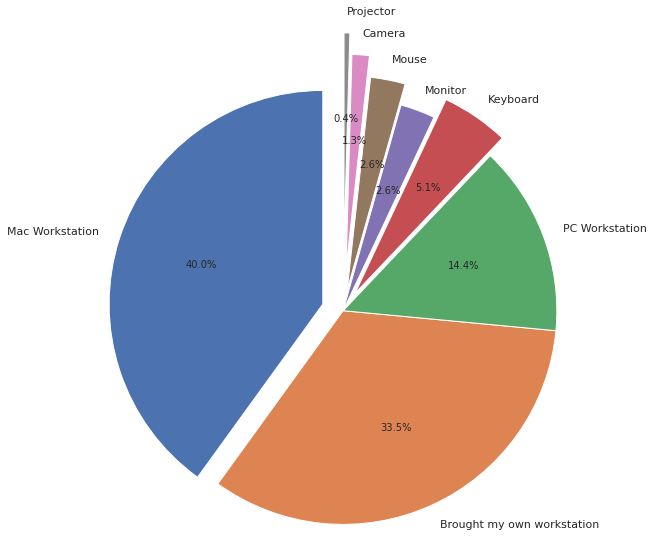

In [ ]:
e7 = df['What equipment will you use?']
e7 = e7.apply(splitting_columns)
e7[0] = e7[0].str.strip()
e7[1] = e7[1].str.strip()
e7[2] = e7[2].str.strip()
e7[3] = e7[3].str.strip()
e8 = e7[0].append(e7[1], ignore_index=True)
e9 = e8.append(e7[2], ignore_index=True)
e10 = e9.append(e7[3], ignore_index=True)
equipment_used_hist = e10.value_counts(dropna=True).to_frame()
equipment_used_hist.columns = ['Count']
equipment_used_hist = equipment_used_hist.reset_index() 
equipment_used_hist = equipment_used_hist.rename(columns={'index':'Equipment'})

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = equipment_used_hist['Equipment']
sizes = equipment_used_hist['Count']
explode = (0.1, 0, 0, 0.1, 0, 0.1, 0.2, 0.3)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(11, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
equipment_used_hist['%'] = (equipment_used_hist['Count'] / equipment_used_hist['Count'].sum()).multiply(100)
equipment_used_hist

,Equipment,Count,%
0,Mac Workstation,275,40.029112
1,Brought my own workstation,230,33.478894
2,PC Workstation,99,14.410480
3,Keyboard,35,5.094614
4,Monitor,18,2.620087
5,Mouse,18,2.620087
6,Camera,9,1.310044
7,Projector,3,0.436681


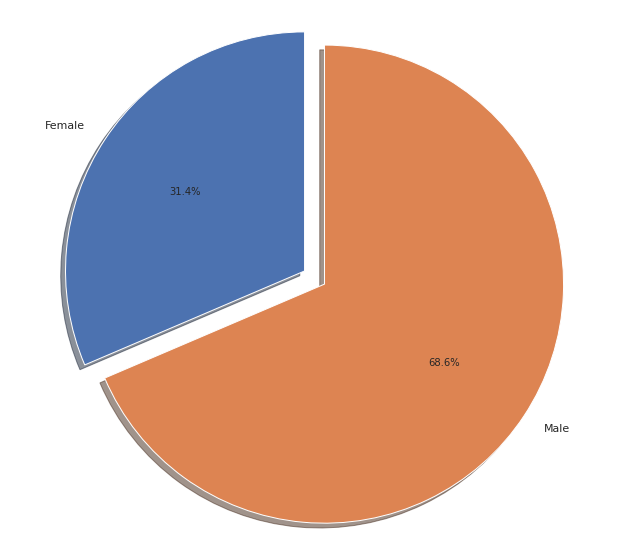

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = [11, 24]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(11, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

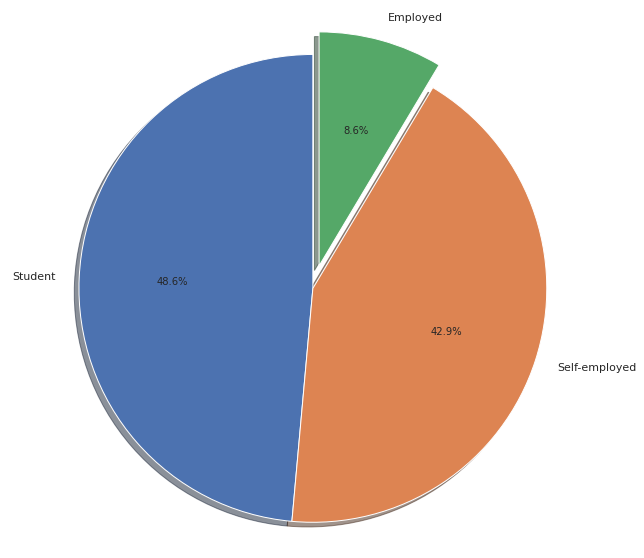

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Self-employed', 'Employed'
sizes = [17, 15, 3]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(11, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

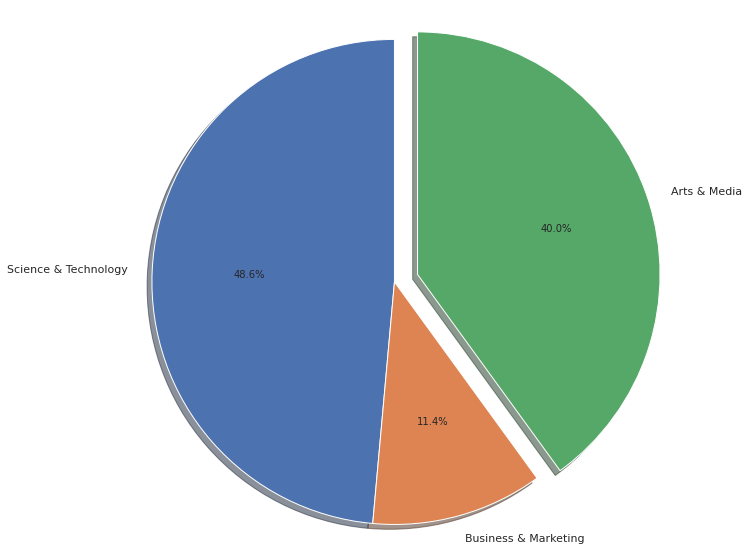

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Science & Technology' , 'Business & Marketing', 'Arts & Media'
sizes = [17, 4, 14]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(11, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

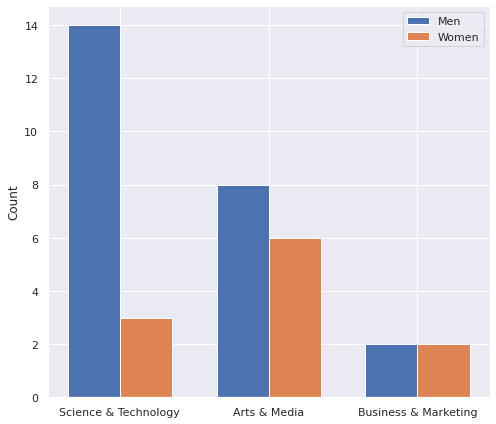

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Science & Technology', 'Arts & Media', 'Business & Marketing']
men_means = [14, 8, 2]
women_means = [3, 6, 2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 6))
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
#ax.set_title('Count by profession and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

In [ ]:
inputss = [['Female', 11], ['Male', 24]]
demographics = pd.DataFrame(inputss, columns=['Category', 'Count'])
demographics

,Category,Count
0,Female,11
1,Male,24


In [ ]:
inputss = [['Science & Technology', 14, 3], ['Arts & Media', 8, 6], ['Business & Marketing', 2, 2]]
demographics = pd.DataFrame(inputss, columns=['Category', 'Female', 'Male'])
demographics

,Category,Female,Male
0,Science & Technology,14,3
1,Arts & Media,8,6
2,Business & Marketing,2,2


In [ ]:
day_of_week_traf = df.index.to_series()
day_of_week_traf = day_of_week_traf.dt.dayofweek 
#headers = ['day of week']
#df9 = pd.DataFrame(df9, columns = headers)
day_of_the_week_traf = day_of_week_traf.value_counts().to_frame()
day_of_the_week_traf['Day of week'] = 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Saturday', 'Sunday'
day_of_the_week_traf.rename(columns={'Timestamp':'Count'})


,Count,Day of week
1,117,Tuesday
2,112,Wednesday
3,105,Thursday
4,103,Friday
0,103,Monday
5,58,Saturday
6,40,Sunday


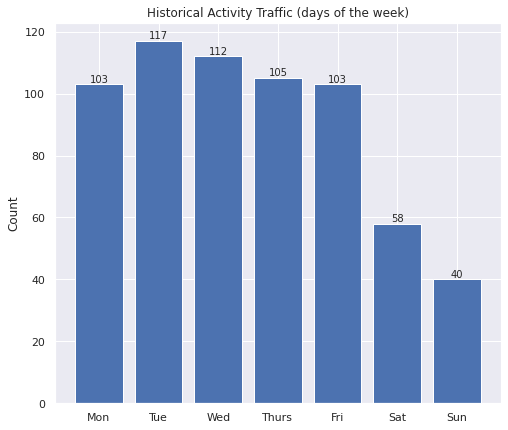

In [ ]:
%matplotlib inline
days = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
s = [103, 117, 112, 105, 103, 58, 40]
width = 8
height = 7
plt.figure(figsize=(width, height))
plt.bar(days, s)
plt.ylabel("Count")
plt.title("Historical Activity Traffic (days of the week)");

for i in range(len(s)):
  plt.annotate(str(s[i]), xy=(days[i],s[i]), ha='center', va='bottom')

plt.show()

In [ ]:
attendance_dates = pd.date_range(df.index.min(), df.index.max())
avarage_daily_attendance = len(df['First Name']) / (attendance_dates.size - missing_dates)
daily_avarage_time_spent = (df['Time Duration(hrs)'].sum() / attendance_dates.size) / avarage_daily_attendance
print('Maximum time that was spent at the hub by a hubber (hrs): {}' .format(df['Time Duration(hrs)'].max()))
print('')
print('daily avarage time spent by hubbers at the hub (hrs): {}' .format(daily_avarage_time_spent))
print('')
print('Minimum time that was spent at the hub by a hubber (hrs): {}' .format(df['Time Duration(hrs)'].min()))

Maximum time that was spent at the hub by a hubber (hrs): 23.983333333333334

daily avarage time spent by hubbers at the hub (hrs): 5.900442846202511

Minimum time that was spent at the hub by a hubber (hrs): 0.25


In [ ]:
date_date = [['Maximum time (daily)', df['Time Duration(hrs)'].max()], ['daily avarage time spent', daily_avarage_time_spent], ['Minimum time (daily)', df['Time Duration(hrs)'].min()]]
Date_Date = pd.DataFrame(date_date, columns=['Argument', 'Time(hrs)'])
Date_Date

,Argument,Time(hrs)
0,Maximum time (daily),23.983333
1,daily avarage time spent,5.900443
2,Minimum time (daily),0.250000
